In [1]:
from utils import prepare_jupyter
prepare_jupyter()

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/experiments-10-08'
NAMES = ['bagging', 'adaboost', 'randomforest', 'lgb', 'catboost', 'xgboost']

def data_path(name):
    return os.path.join(BASE_DIR, name)

## Przygotowanie ogólnego dataframe'u

Do wizualizacji na pracy

In [15]:
all_df = [pd.read_csv(data_path(f'{name}experiment-ensemble.csv'), index_col=0) for name in NAMES]
big_df = pd.concat(all_df, sort=True).drop(columns='n_jobs')
big_df.head(n=2)

,accuracy,corr,coverage_minmax,coverage_std,dataset_name,df,entropy,kw,max_depth,n_estimators,name,node_diversity,q,used_attributes_ratio
0,0.798507,0.318450,0.127687,0.049005,SPECT,0.100000,0.365672,0.003564,2,5,Bagging,0.8,0.293429,0.318182
1,0.798507,0.475867,0.098783,0.037969,SPECT,0.127032,0.231343,0.006455,2,10,Bagging,0.8,0.444219,0.363636


## Pojedynczy wykres

Generowanie jednego wykresu do opisu poszczególnych rzeczy znajdujących się na nim

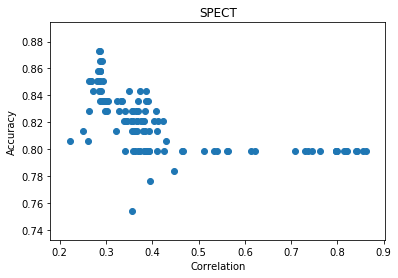

In [23]:
LABELS_DICT = {
    'corr': 'Correlation',
    'coverage_minmax': 'Coverage (minmax)',
    'coverage_std': 'Coverage (std)',
    'entropy': 'Entropy',
    'kw': 'Kohavi-Wolpert',
    'node_diversity': 'Node diversity',
    'q': 'Q',
    'used_attributes_ratio': 'Used attributes ratio',
    'accuracy': 'Accuracy'
}

dataset_name = 'SPECT'
rf_df = pd.read_csv(data_path('randomforestexperiment-ensemble.csv'), index_col=0)

data_df = rf_df[rf_df['dataset_name'] == dataset_name]
values = data_df[['corr', 'accuracy']].values
xs, ys = values[:, 0], values[:, 1]

fig, ax = plt.subplots()

ax.set_title(dataset_name)
ax.set_xlabel(LABELS_DICT['corr'])
ax.set_ylabel(LABELS_DICT['accuracy'])
ax.scatter(xs, ys)

fig.savefig('./example.pdf')